#### Swapnil Chavan
#### DSC550: Feature Selection and Dimensionality Reduction


#### PART 1

#### PART 1

##### Import the housing data as a data frame and ensure that the data is loaded properly.

In [36]:
# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
df = pd.read_csv("C:/Users/swapn/Data Mining/house-prices-advanced-regression-techniques/housing_data.csv.csv")

In [38]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


##### Drop the "Id" column and any features that are missing more than 40% of their values.

In [39]:
df.drop(['Id'], axis=1, inplace=True)

In [40]:
df.dropna(axis=1, thresh=len(df)*.4, inplace=True)

##### For numerical columns, fill in any missing data with the median value.

In [41]:
for col in df.columns:
    
    if df[col].dtype == 'int64' or df[col].dtype == 'float64':
        df[col].fillna(df[col].median(), inplace=True)


C:\Users\swapn\AppData\Local\Temp\ipykernel_4612\802620369.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\swapn\AppData\Local\Temp\ipykernel_4612\802620369.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

##### For categorical columns, fill in any missing data with the most common value (mode).

In [42]:
for col in df.columns:
    
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\swapn\AppData\Local\Temp\ipykernel_4612\54814331.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


Let's check it once

In [43]:
df.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64

In [44]:
##### 5. Convert the categorical columns to dummy variables

In [45]:
df = pd.get_dummies(df, drop_first=True)

In [46]:
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,False,False,False,False,True,False,False,False,True,False
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,False,False,False,False,True,False,False,False,True,False
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,False,False,False,False,True,False,False,False,True,False
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,False,False,False,False,True,False,False,False,False,False
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,False,False,False,False,True,False,False,False,True,False


##### Split the data into a training and test set, where the SalePrice column is the target.

In [47]:
X = df.drop(['SalePrice'], axis=1)
y = df['SalePrice']

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

##### Run a linear regression and report the R2-value and RMSE on the test set.

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [51]:
model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train, y_train)
y_pred = model_linear_regression.predict(X_test)

In [52]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f'RMSE: {rmse}')
print(f'R2: {r2}')

RMSE: 47806.87574427816
R2: 0.6633524451601556


##### Fit and transform the training features with a PCA so that 90% of the variance is retained

In [54]:
from sklearn.decomposition import PCA
pca = PCA(.9)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

##### How many features are in the PCA-transformed matrix?

In [56]:
print(f'Number of features in PCA-transformed matrix: {X_train_pca.shape[1]}')

Number of features in PCA-transformed matrix: 1


##### Transform but DO NOT fit the test features with the same PCA. 
##### Repeat step 7 with your PCA transformed data.

In [57]:
model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train_pca, y_train)
y_pred = model_linear_regression.predict(X_test_pca)

mean_squared_error_pca = np.sqrt(mean_squared_error(y_test, y_pred))
r2_pca = r2_score(y_test, y_pred)
print(f'RMSE: {mean_squared_error_pca}')
print(f'R2: {r2_pca}')

RMSE: 79269.95643872386
R2: 0.0744242280403018


##### Take your original training features (from step 6) and apply a min-max scaler to them.
##### Find the min-max scaled features in your training set that have a variance above 0.1

In [58]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

###### Transform but DO NOT fit the test features with the same steps applied in steps 11 and 12.
###### Repeat step 7 with the high variance data.

In [59]:
model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train_scaled, y_train)
y_pred = model_linear_regression.predict(X_test_scaled)

In [60]:
mean_squared_error_scaled = np.sqrt(mean_squared_error(y_test, y_pred))
r2_scaled = r2_score(y_test, y_pred)
print(f'RMSE: {mean_squared_error_scaled}')
print(f'R2: {r2_scaled}')

RMSE: 661363759080523.6
R2: -6.442812980819899e+19


#### PART 2

##### Import the data as a data frame and ensure it is loaded correctly.

In [69]:
from sklearn.utils import shuffle
import pickle
%matplotlib inline
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [66]:
df1 = pd.read_csv('C:/Users/swapn/Data Mining/mushroom/mushrooms.csv')

In [67]:
df1.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


##### Convert the categorical features (all of them) to dummy variables.

In [72]:
label_encoder = preprocessing.LabelEncoder()

In [74]:
df1['class'] = label_encoder.fit_transform(df1['class'])

In [75]:
df_col = list(df1.columns)

In [79]:
for i in range(len(df_col)):
    df1[df_col[i]] = LabelEncoder().fit_transform(df1[df_col[i]])    

In [80]:
df1.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [81]:
y = df1['class']
df1.drop(columns= ['class'], inplace=True)

##### Split the data into a training and test set.

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1, y, test_size=0.3)

##### Fit a decision tree classifier on the training set.

In [ ]:
we are goinng to instanciate the DeceisionTreeClassifier model with the crieria of gini index

In [85]:
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion = 'gini', max_depth=3, random_state=0)

In [86]:
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

##### Report the accuracy and create a confusion matrix for the model prediction on the test set.

In [89]:
y_pred_gini = clf_gini.predict(X_test)
from sklearn.metrics import accuracy_score

In [92]:
print("Model Accuracy score is: {0:0.4f}".format(accuracy_score(y_test, y_pred_gini)))

Model Accuracy score is: 0.9705


In [93]:
from sklearn.metrics import confusion_matrix

In [94]:
print(confusion_matrix(y_test,y_pred_gini))

[[1197   50]
 [  22 1169]]


##### Create a visualization of the decision tree.

[Text(0.5, 0.875, 'x[8] <= 3.5\ngini = 0.499\nsamples = 5686\nvalue = [2961.0, 2725.0]'),
 Text(0.25, 0.625, 'x[20] <= 3.5\ngini = 0.284\nsamples = 2309\nvalue = [396, 1913]'),
 Text(0.125, 0.375, 'x[19] <= 1.5\ngini = 0.221\nsamples = 418\nvalue = [365, 53]'),
 Text(0.0625, 0.125, 'gini = 0.0\nsamples = 32\nvalue = [0, 32]'),
 Text(0.1875, 0.125, 'gini = 0.103\nsamples = 386\nvalue = [365, 21]'),
 Text(0.375, 0.375, 'x[10] <= 2.0\ngini = 0.032\nsamples = 1891\nvalue = [31, 1860]'),
 Text(0.3125, 0.125, 'gini = 0.012\nsamples = 1871\nvalue = [11, 1860]'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 20\nvalue = [20, 0]'),
 Text(0.75, 0.625, 'x[19] <= 1.5\ngini = 0.365\nsamples = 3377\nvalue = [2565, 812]'),
 Text(0.625, 0.375, 'x[10] <= 0.5\ngini = 0.197\nsamples = 497\nvalue = [55, 442]'),
 Text(0.5625, 0.125, 'gini = 0.0\nsamples = 55\nvalue = [55, 0]'),
 Text(0.6875, 0.125, 'gini = 0.0\nsamples = 442\nvalue = [0, 442]'),
 Text(0.875, 0.375, 'x[7] <= 0.5\ngini = 0.224\nsamples = 2880\

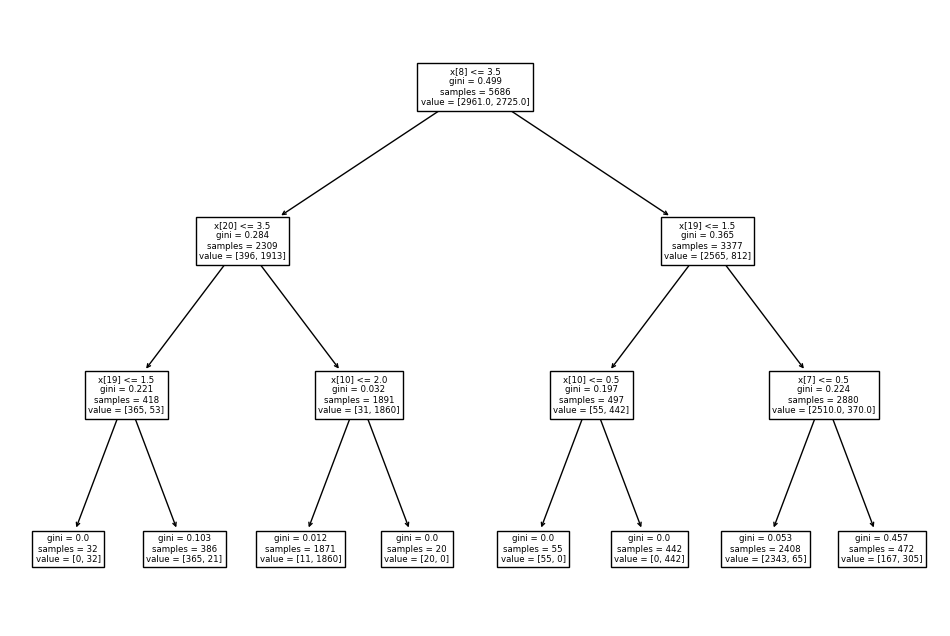

In [96]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf_gini.fit(X_train, y_train))

##### Use a χ2-statistic selector to pick the five best features for this data (see section 10.4 of the Machine Learning with Python Cookbook).

In [102]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [105]:
sel5 = SelectKBest(score_func=chi2, k=5)
sel5.fit(df1.fillna(0),y)

SelectKBest(k=5, score_func=<function chi2 at 0x0000022928066020>)

##### which five features were selected in step 7? Hint: Use the get_support function

In [108]:
df1.columns[sel5.get_support()].to_numpy()
df2 = sel5.transform(df1)
df2 = pd.DataFrame(df2)

In [109]:
df2.head()

,0,1,2,3,4
0,1,1,4,3,4
1,1,0,4,2,4
2,1,0,5,2,4
3,1,1,5,3,4
4,0,0,4,3,0


##### repeat steps 4 and 5 with the five best features selected in step 7.

In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df2, y, test_size=0.3)

In [112]:
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion = 'gini', max_depth=3, random_state=0)

In [113]:
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [114]:
y_pred_gini = clf_gini.predict(X_test)
from sklearn.metrics import accuracy_score

In [115]:
print("Model Accuracy score is: {0:0.4f}".format(accuracy_score(y_test, y_pred_gini)))

Model Accuracy score is: 0.8568


In [116]:
print(confusion_matrix(y_test,y_pred_gini))

[[1158  144]
 [ 205  931]]


##### Findings